In [5]:
#Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. 
#Explore the relationships between variables and identify patterns and trends in the data.

#Sample Dataset :- https://www.kaggle.com/c/titanic/data

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')
Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64
'Embarked' column is not found in the dataset.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Survived                 887 non-null    int64   
 1   Pclass                   887 non-null    int64   
 2   Name                     887 non-null    object  
 3   Sex                      887 non-null    category
 4   Age                      887 non-null    float64 
 5   Siblings/Spouses Aboard  887 non-null    int64   
 6   Parents/Children

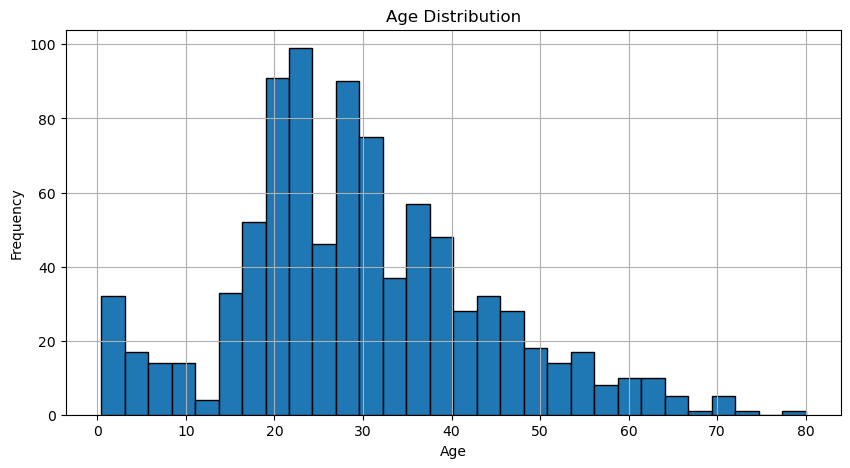

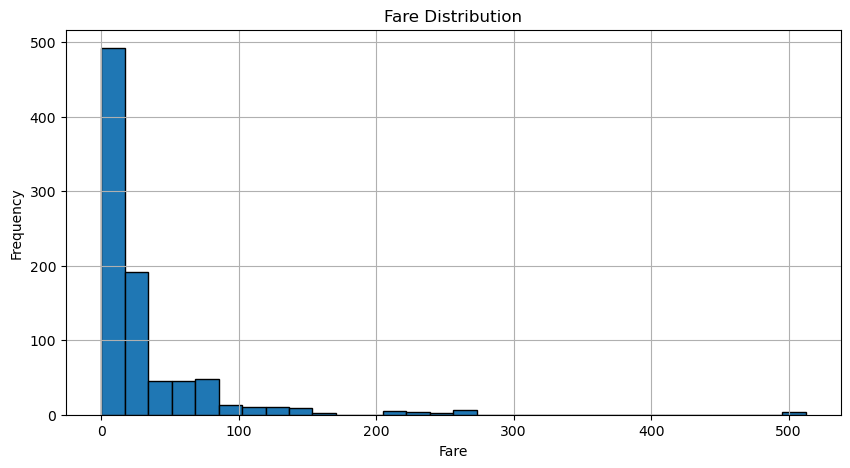

C:\Users\cheek\New folder\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


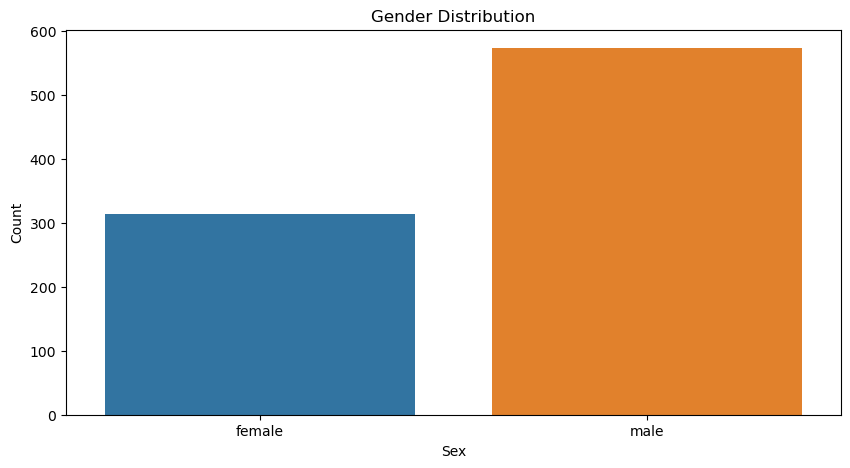

C:\Users\cheek\New folder\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


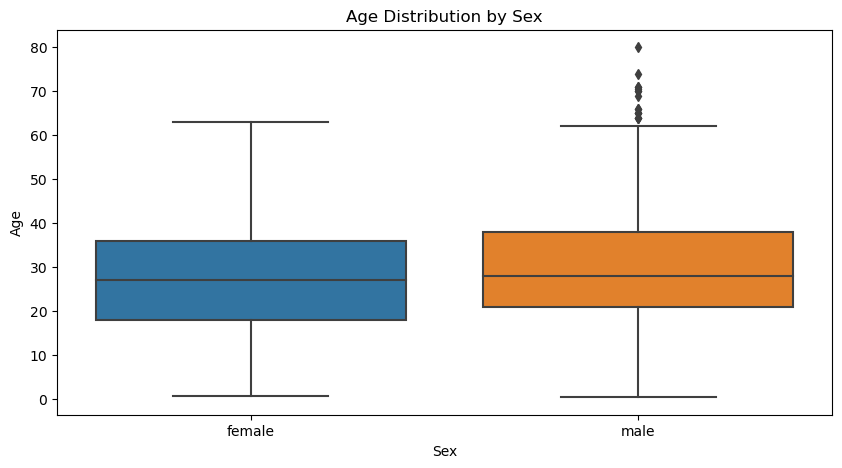

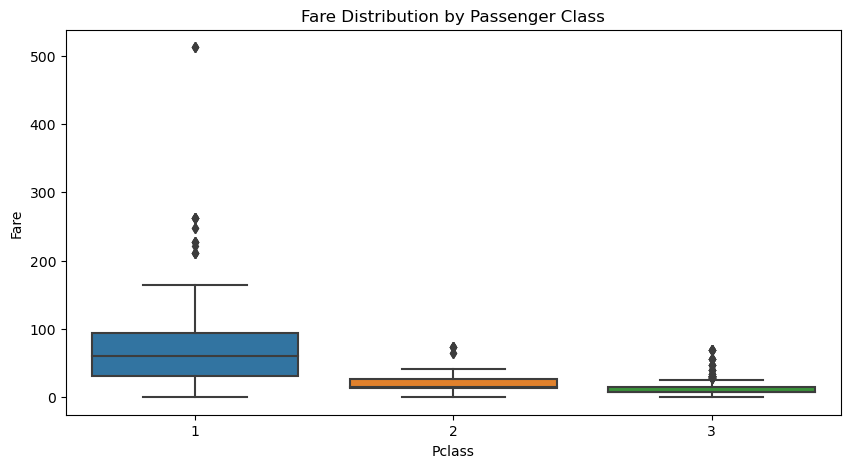

C:\Users\cheek\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cheek\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cheek\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cheek\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


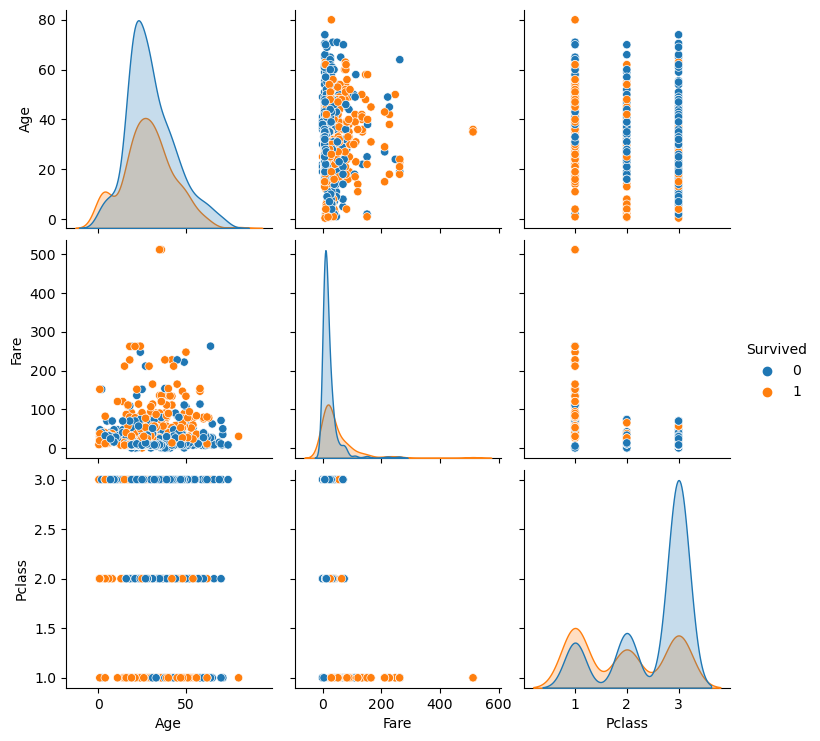

C:\Users\cheek\New folder\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


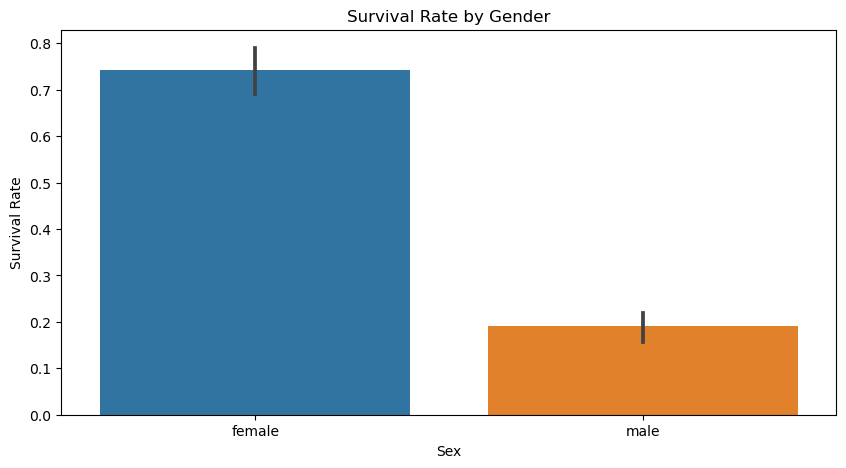

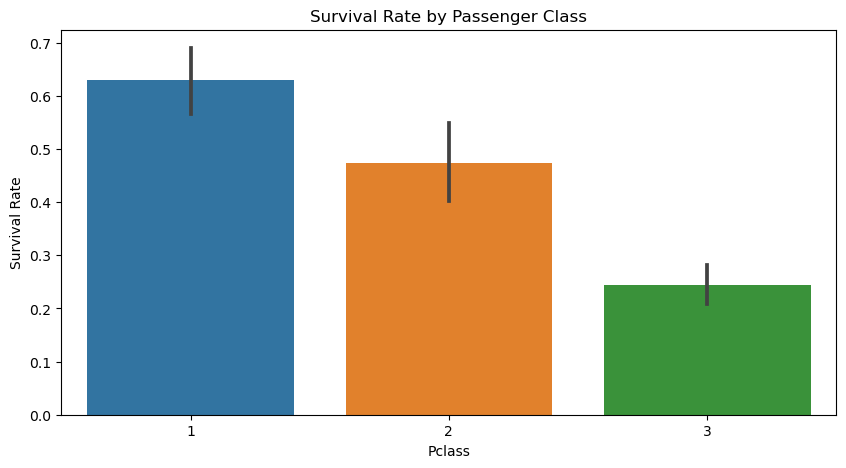

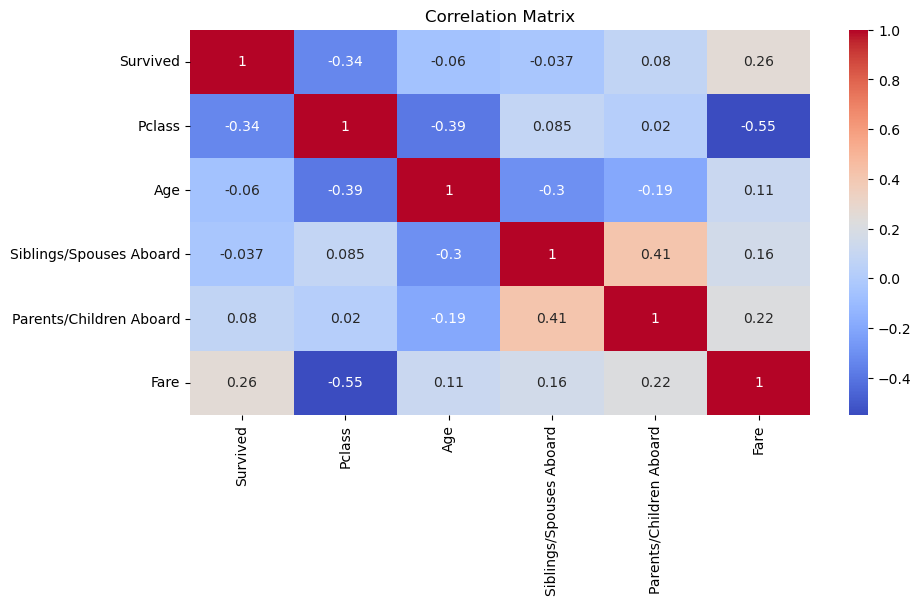

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
df = pd.read_csv(url)


print(df.columns)


print(df.isnull().sum())


df['Age'].fillna(df['Age'].median(), inplace=True)


if 'Embarked' in df.columns:
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
else:
    print("'Embarked' column is not found in the dataset.")


if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'], inplace=True)


if 'Sex' in df.columns:
    df['Sex'] = df['Sex'].astype('category')
if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].astype('category')


print(df.info())


print(df.describe())


if 'Sex' in df.columns:
    print(df['Sex'].value_counts())
if 'Embarked' in df.columns:
    print(df['Embarked'].value_counts())


plt.figure(figsize=(10, 5))
df['Age'].hist(bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
df['Fare'].hist(bins=30, edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


if 'Sex' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x='Sex')
    plt.title('Gender Distribution')
    plt.xlabel('Sex')
    plt.ylabel('Count')
    plt.show()

if 'Embarked' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x='Embarked')
    plt.title('Embarkation Port Distribution')
    plt.xlabel('Embarked')
    plt.ylabel('Count')
    plt.show()


if 'Sex' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x='Sex', y='Age')
    plt.title('Age Distribution by Sex')
    plt.xlabel('Sex')
    plt.ylabel('Age')
    plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Pclass', y='Fare')
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()


sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived', diag_kind='kde')
plt.show()


if 'Sex' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df, x='Sex', y='Survived')
    plt.title('Survival Rate by Gender')
    plt.xlabel('Sex')
    plt.ylabel('Survival Rate')
    plt.show()


plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()


numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
